In [360]:
# Import Libraries and Dependencies
import pandas as pd
import numpy as np
import re
# import spacy
import subprocess
import os
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split    # To split the dataset into train and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder   # For scaling and encoding categorical variables
from sklearn.compose import ColumnTransformer           # To apply transformers to specific columns
from sklearn.impute import SimpleImputer                # For handling missing data
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.svm import SVC                            # Support Vector Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score # For evaluating the model
import joblib
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate, BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2

from sklearn.utils.class_weight import compute_class_weight

from imblearn.combine import SMOTEENN
from collections import Counter

import traceback

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np


In [361]:
# read in disease_df_encoded, final_train_df, and prognosis_df from Final_Resources folder



disease_df = pd.read_csv('Final_Resources/disease_df_encoded.csv')

final_train_df = pd.read_csv('Final_Resources/final_train_df.csv')

prognosis_df = pd.read_csv('Final_Resources/prognosis_df.csv')





In [362]:
disease_df.head()

,Prognosis,abdominal cramps,abdominal pain,abdominal swelling,abnormal fatigue,abnormal fluid accumulation in the abdomen,absence of bowel movements for days,absence of menstruation,absent speech,acid reflux,...,walking difficulty,weakness,weight gain,weight loss,wheezing,white patches on the skin,white pupil,widespread itching,yellowing of the skin and eyes,Prognosis_Mapped
0,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Acetonemia
1,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Acetonemia
2,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Acetonemia
3,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Acetonemia
4,Acute Bronchitis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,bronchitis


In [363]:
final_train_df.head()

,Prognosis,pain chest,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat sweating increased,palpitation,...,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts,Prognosis_Mapped
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alzheimer's disease
1,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alzheimer's disease
2,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alzheimer's disease
3,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alzheimer's disease
4,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alzheimer's disease


In [364]:
prognosis_df.head()

,Prognosis,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Prognosis_Mapped
0,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acquired immuno-deficiency syndrome HIV hiv in...
1,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acquired immuno-deficiency syndrome HIV hiv in...
2,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acquired immuno-deficiency syndrome HIV hiv in...
3,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acquired immuno-deficiency syndrome HIV hiv in...
4,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acquired immuno-deficiency syndrome HIV hiv in...


In [373]:
# drop the Prognosis_Mapped column from the final_train_df, disease_df, and prognosis_df
final_train_df = final_train_df.drop('Prognosis_Mapped', axis=1)
disease_df = disease_df.drop('Prognosis_Mapped', axis=1)
prognosis_df = prognosis_df.drop('Prognosis_Mapped', axis=1)




In [374]:
disease_df.head()

,Prognosis,abdominal cramps,abdominal pain,abdominal swelling,abnormal fatigue,abnormal fluid accumulation in the abdomen,absence of bowel movements for days,absence of menstruation,absent speech,acid reflux,...,waking up too early,walking difficulty,weakness,weight gain,weight loss,wheezing,white patches on the skin,white pupil,widespread itching,yellowing of the skin and eyes
0,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Acute Bronchitis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [378]:

# apply labelencoder to the Prognosis column
label_encoder = LabelEncoder()
disease_df['Prognosis'] = label_encoder.fit_transform(disease_df['Prognosis'])
final_train_df['Prognosis'] = label_encoder.fit_transform(final_train_df['Prognosis'])
prognosis_df['Prognosis'] = label_encoder.fit_transform(prognosis_df['Prognosis'])






In [379]:
# convert all columns to float except the Prognosis column 
disease_df = disease_df.astype(float)
final_train_df = final_train_df.astype(float)
prognosis_df = prognosis_df.astype(float)

In [380]:
disease_df.head()

,Prognosis,abdominal cramps,abdominal pain,abdominal swelling,abnormal fatigue,abnormal fluid accumulation in the abdomen,absence of bowel movements for days,absence of menstruation,absent speech,acid reflux,...,waking up too early,walking difficulty,weakness,weight gain,weight loss,wheezing,white patches on the skin,white pupil,widespread itching,yellowing of the skin and eyes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [381]:
final_train_df

,Prognosis,pain chest,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat sweating increased,palpitation,...,feces in rectum,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2560,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2561,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2562,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [382]:
prognosis_df.head() 

,Prognosis,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [383]:
#display dtypes of the 3 datasets
print(disease_df.dtypes)
print(final_train_df.dtypes)
print(prognosis_df.dtypes)




Prognosis                         float64
abdominal cramps                  float64
abdominal pain                    float64
abdominal swelling                float64
abnormal fatigue                  float64
                                   ...   
wheezing                          float64
white patches on the skin         float64
white pupil                       float64
widespread itching                float64
yellowing of the skin and eyes    float64
Length: 263, dtype: object
Prognosis                float64
pain chest               float64
shortness of breath      float64
dizziness                float64
asthenia                 float64
                          ...   
air fluid level          float64
catching breath          float64
large-for-dates fetus    float64
immobile                 float64
homicidal thoughts       float64
Length: 401, dtype: object
Prognosis               float64
itching                 float64
skin_rash               float64
nodal_skin_eruptions    f

In [384]:
# save the 3 datasets
disease_df.to_csv('Final_Final_Resources/disease_df_encoded.csv', index=False)
final_train_df.to_csv('Final_Final_Resources/final_train_df.csv', index=False)
prognosis_df.to_csv('Final_Final_Resources/prognosis_df.csv', index=False)




In [365]:
# Display shapes of all three dataframes
print("disease_df shape:", disease_df.shape)
print("final_train_df shape:", final_train_df.shape)
print("prognosis_df shape:", prognosis_df.shape)

disease_df shape: (511, 264)
final_train_df shape: (2564, 402)
prognosis_df shape: (4961, 134)


In [366]:
# # Function to analyze feature importance
# def analyze_feature_importance(df, n_top_features=20):
#     # Create a copy of the dataframe
#     df_copy = df.copy()
    
#     # Encode the Prognosis column
#     label_encoder = LabelEncoder()
#     df_copy['Prognosis'] = label_encoder.fit_transform(df_copy['Prognosis'])
    
#     # Separate features and target
#     X = df_copy.drop('Prognosis', axis=1)
#     y = df_copy['Prognosis']
    
#     # Convert boolean columns to int if they exist
#     X = X.astype(float)
    
#     # Train a Random Forest Classifier
#     rf = RandomForestClassifier(n_estimators=100, random_state=42)
#     rf.fit(X, y)
    
#     # Get feature importance
#     importance = rf.feature_importances_
    
#     # Create a dataframe of features and their importance scores
#     feature_importance = pd.DataFrame({
#         'feature': X.columns,
#         'importance': importance
#     })
    
#     # Sort by importance and get top n features
#     feature_importance = feature_importance.sort_values('importance', ascending=False).head(n_top_features)
    
#     # Create a bar plot
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='importance', y='feature', data=feature_importance)
#     plt.title(f'Top {n_top_features} Most Important Features')
#     plt.xlabel('Importance Score')
#     plt.tight_layout()
#     plt.show()
    
#     return feature_importance

# # Analyze feature importance for each dataset
# print("Feature Importance for disease_df:")
# disease_importance = analyze_feature_importance(disease_df)
# print("\nFeature Importance for final_train_df:")
# final_train_importance = analyze_feature_importance(final_train_df)
# print("\nFeature Importance for prognosis_df:")
# prognosis_importance = analyze_feature_importance(prognosis_df)

# # Display the top 10 important features for each dataset
# print("\nTop 10 Important Features:")
# print("\ndisease_df:")
# print(disease_importance.head(10))
# print("\nfinal_train_df:")
# print(final_train_importance.head(10))
# print("\nprognosis_df:")
# print(prognosis_importance.head(10))

In [367]:
# Let's check the data types in each dataframe
print("disease_df dtypes:")
print(disease_df.dtypes)
print("\nfinal_train_df dtypes:")
print(final_train_df.dtypes)
print("\nprognosis_df dtypes:")
print(prognosis_df.dtypes)

disease_df dtypes:
Prognosis                         object
abdominal cramps                    bool
abdominal pain                      bool
abdominal swelling                  bool
abnormal fatigue                    bool
                                   ...  
white patches on the skin           bool
white pupil                         bool
widespread itching                  bool
yellowing of the skin and eyes      bool
Prognosis_Mapped                  object
Length: 264, dtype: object

final_train_df dtypes:
Prognosis                object
pain chest                int64
shortness of breath       int64
dizziness                 int64
asthenia                  int64
                          ...  
catching breath           int64
large-for-dates fetus     int64
immobile                  int64
homicidal thoughts        int64
Prognosis_Mapped         object
Length: 402, dtype: object

prognosis_df dtypes:
Prognosis               object
itching                  int64
skin_rash       

Feature Importance for disease_df:


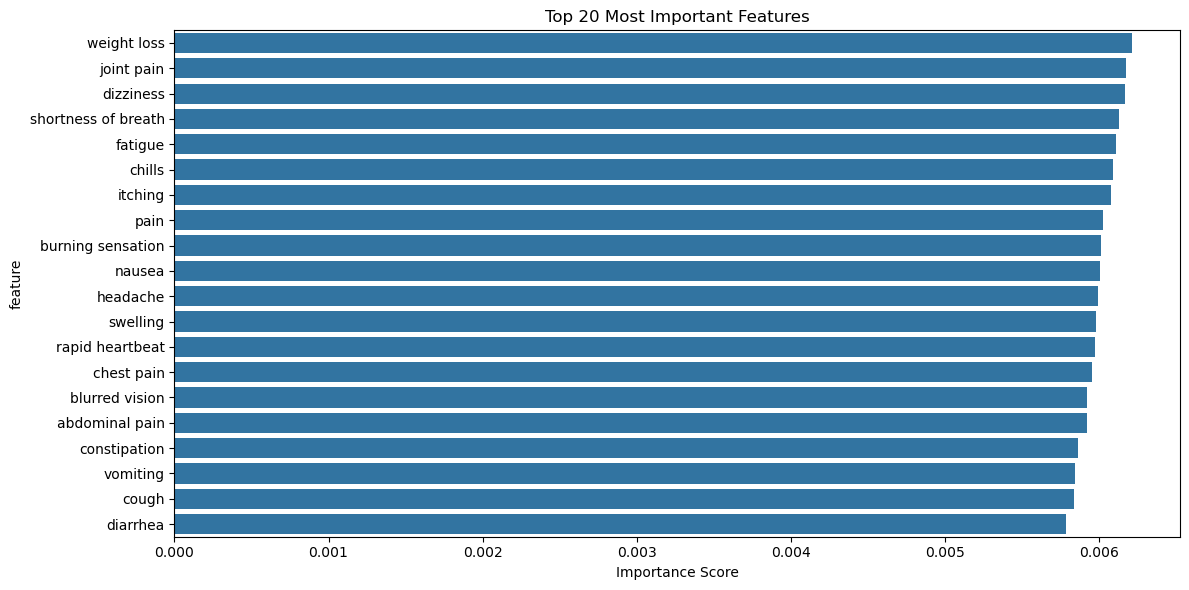


Feature Importance for final_train_df:


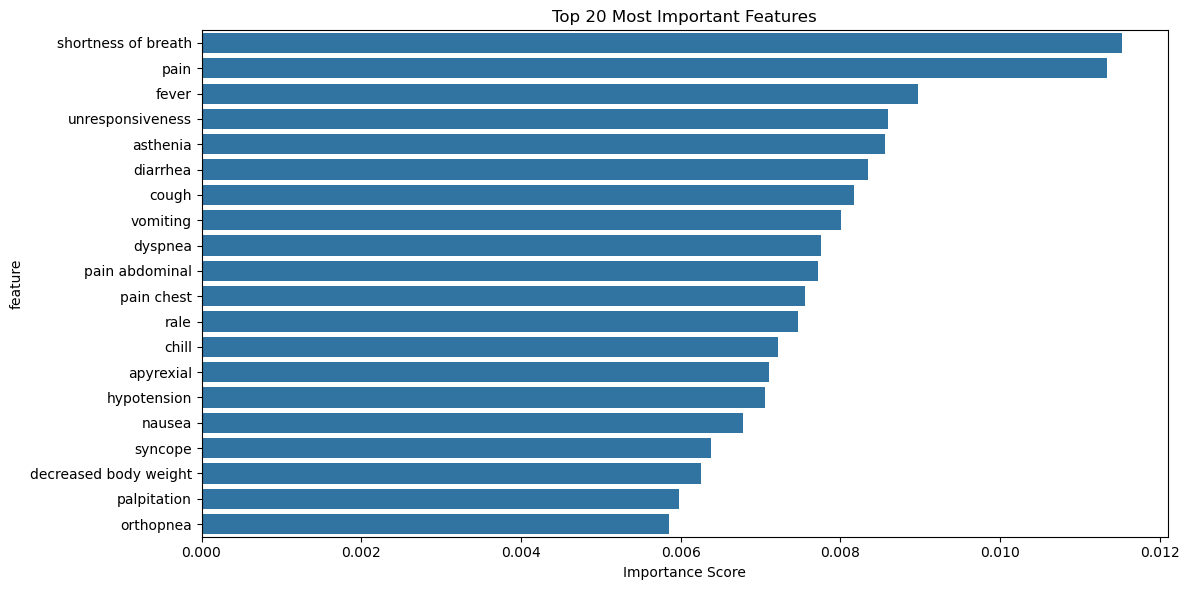


Feature Importance for prognosis_df:


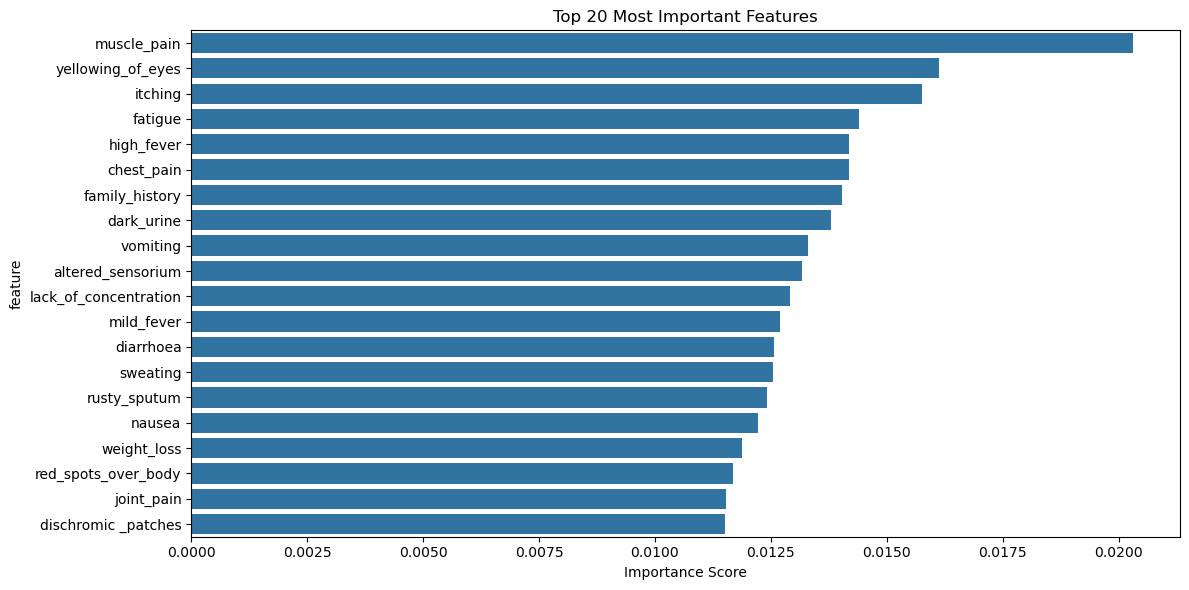


Top 10 Important Features:

disease_df:
                 feature  importance
256          weight loss    0.006213
131           joint pain    0.006173
69             dizziness    0.006169
210  shortness of breath    0.006129
89               fatigue    0.006108
40                chills    0.006086
128              itching    0.006075
169                 pain    0.006022
33     burning sensation    0.006014
159               nausea    0.006005

final_train_df:
                 feature  importance
1    shortness of breath    0.011525
76                  pain    0.011334
45                 fever    0.008967
16      unresponsiveness    0.008591
3               asthenia    0.008555
81              diarrhea    0.008348
44                 cough    0.008177
18              vomiting    0.008014
62               dyspnea    0.007757
156       pain abdominal    0.007726

prognosis_df:
               feature  importance
97         muscle_pain    0.020307
43   yellowing_of_eyes    0.016123
0       

In [368]:
# Function to analyze feature importance
def analyze_feature_importance(df, n_top_features=20):
    # Create a copy of the dataframe
    df_copy = df.copy()
    
    # Drop the Prognosis_Mapped column if it exists
    if 'Prognosis_Mapped' in df_copy.columns:
        df_copy = df_copy.drop('Prognosis_Mapped', axis=1)
    
    # Encode the Prognosis column
    label_encoder = LabelEncoder()
    df_copy['Prognosis'] = label_encoder.fit_transform(df_copy['Prognosis'])
    
    # Separate features and target
    X = df_copy.drop('Prognosis', axis=1)
    y = df_copy['Prognosis']
    
    # Convert boolean columns to int (1/0)
    for col in X.columns:
        if X[col].dtype == bool:
            X[col] = X[col].astype(int)
    
    # Train a Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    # Get feature importance
    importance = rf.feature_importances_
    
    # Create a dataframe of features and their importance scores
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': importance
    })
    
    # Sort by importance and get top n features
    feature_importance = feature_importance.sort_values('importance', ascending=False).head(n_top_features)
    
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Top {n_top_features} Most Important Features')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
    
    return feature_importance

# Analyze feature importance for each dataset
print("Feature Importance for disease_df:")
disease_importance = analyze_feature_importance(disease_df)
print("\nFeature Importance for final_train_df:")
final_train_importance = analyze_feature_importance(final_train_df)
print("\nFeature Importance for prognosis_df:")
prognosis_importance = analyze_feature_importance(prognosis_df)

# Display the top 10 important features for each dataset
print("\nTop 10 Important Features:")
print("\ndisease_df:")
print(disease_importance.head(10))
print("\nfinal_train_df:")
print(final_train_importance.head(10))
print("\nprognosis_df:")
print(prognosis_importance.head(10))

In [369]:
# on


In [370]:
disease_df.head()

,Prognosis,abdominal cramps,abdominal pain,abdominal swelling,abnormal fatigue,abnormal fluid accumulation in the abdomen,absence of bowel movements for days,absence of menstruation,absent speech,acid reflux,...,walking difficulty,weakness,weight gain,weight loss,wheezing,white patches on the skin,white pupil,widespread itching,yellowing of the skin and eyes,Prognosis_Mapped
0,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Acetonemia
1,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Acetonemia
2,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Acetonemia
3,Acetonemia,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Acetonemia
4,Acute Bronchitis,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,bronchitis


In [371]:
final_train_df.head()

,Prognosis,pain chest,shortness of breath,dizziness,asthenia,fall,syncope,vertigo,sweat sweating increased,palpitation,...,prodrome,hypoproteinemia,alcohol binge episode,abdomen acute,air fluid level,catching breath,large-for-dates fetus,immobile,homicidal thoughts,Prognosis_Mapped
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alzheimer's disease
1,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alzheimer's disease
2,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alzheimer's disease
3,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alzheimer's disease
4,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alzheimer's disease


In [372]:

prognosis_df.head()


,Prognosis,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Prognosis_Mapped
0,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acquired immuno-deficiency syndrome HIV hiv in...
1,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acquired immuno-deficiency syndrome HIV hiv in...
2,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acquired immuno-deficiency syndrome HIV hiv in...
3,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acquired immuno-deficiency syndrome HIV hiv in...
4,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acquired immuno-deficiency syndrome HIV hiv in...


Disease_df Feature Distributions:


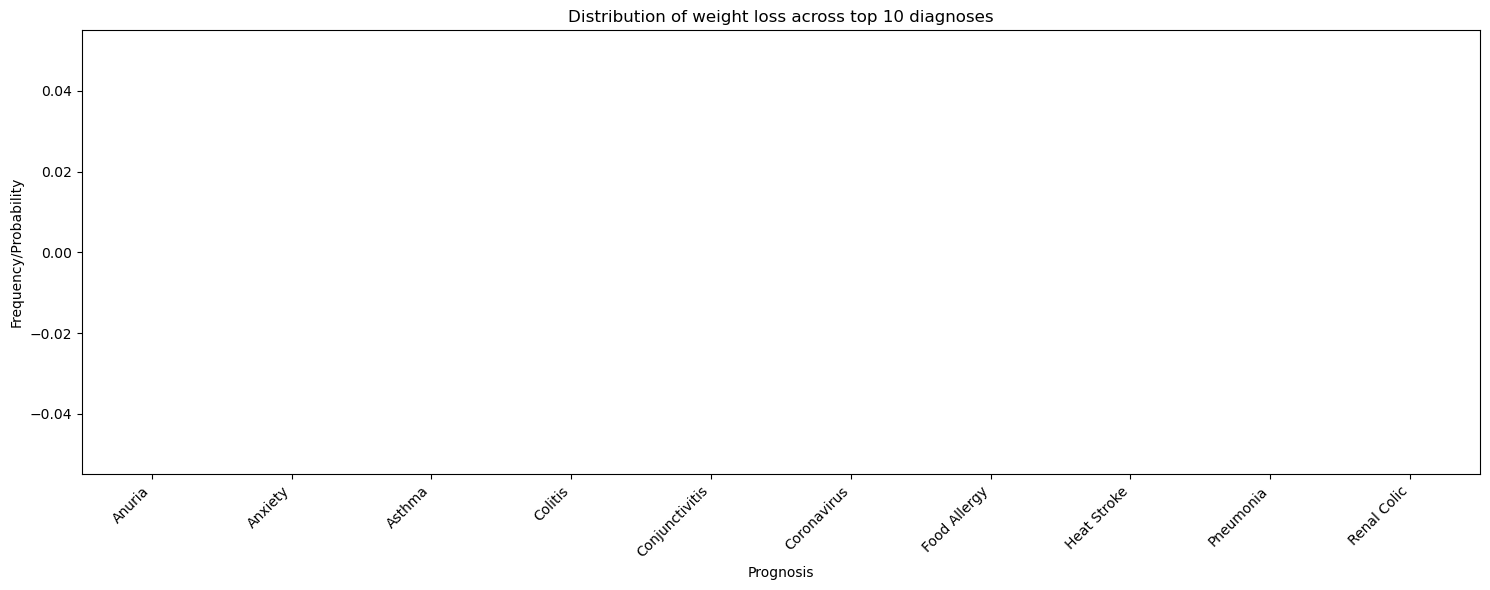

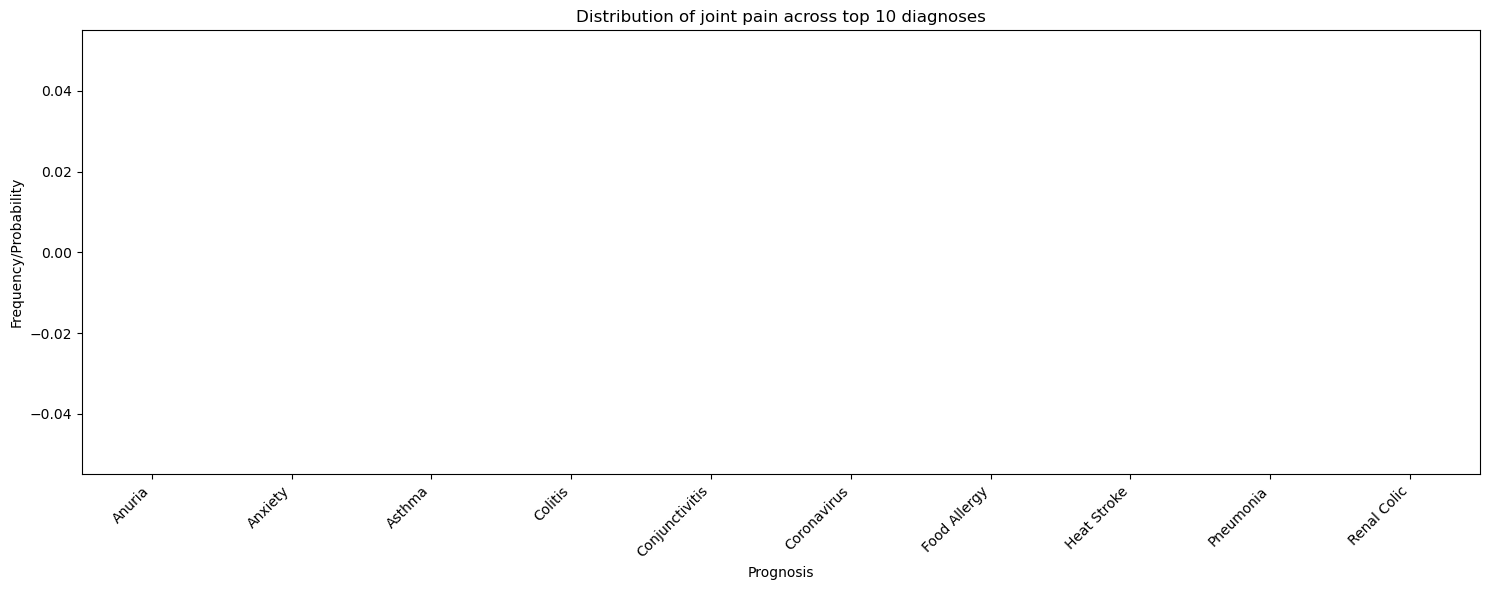

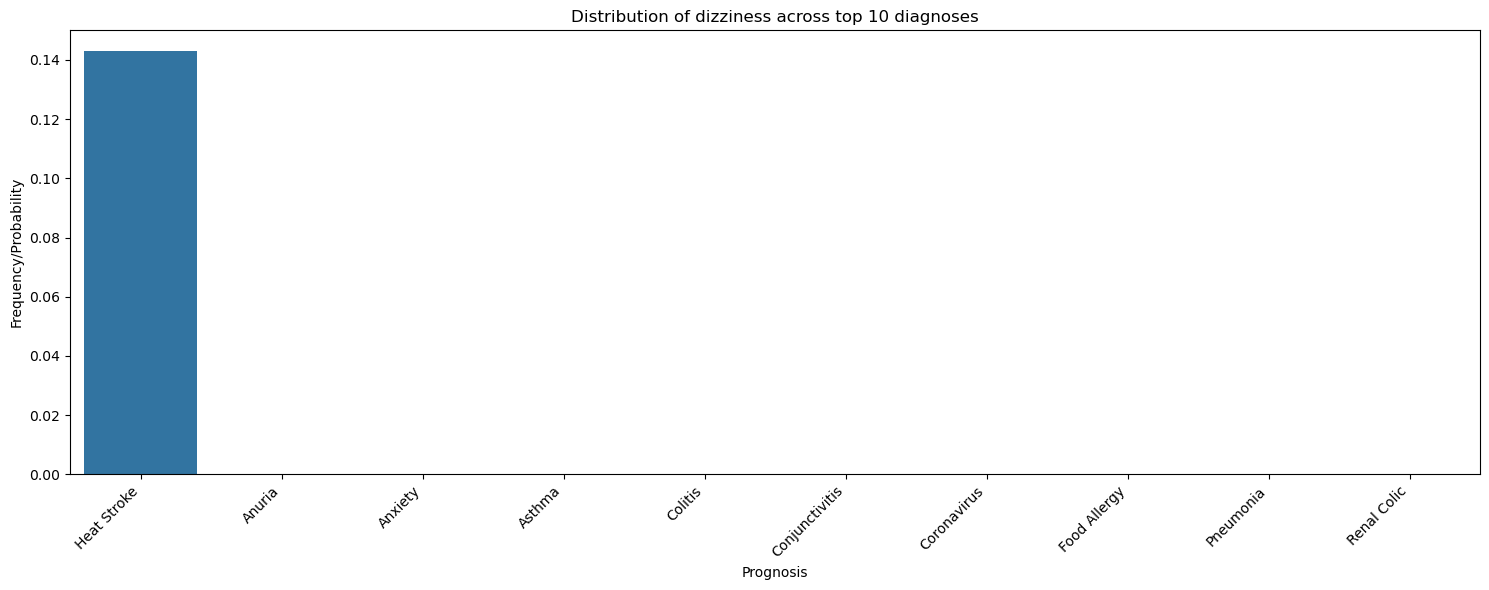

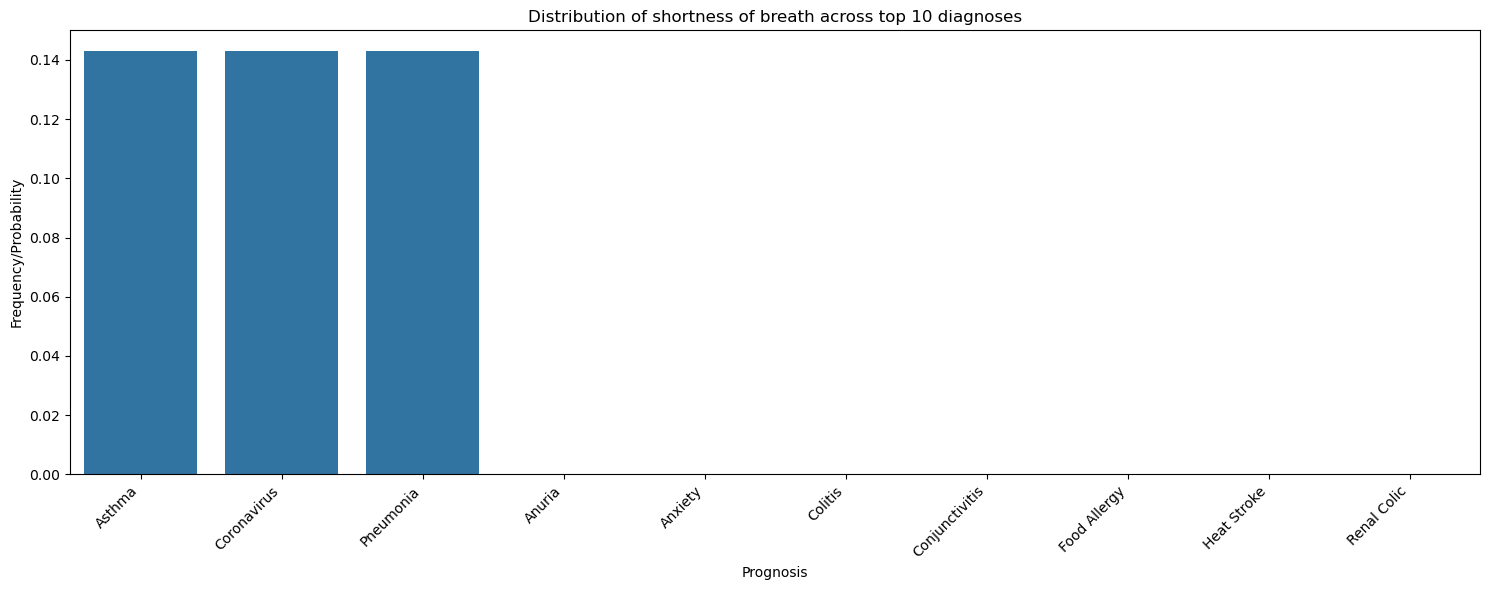

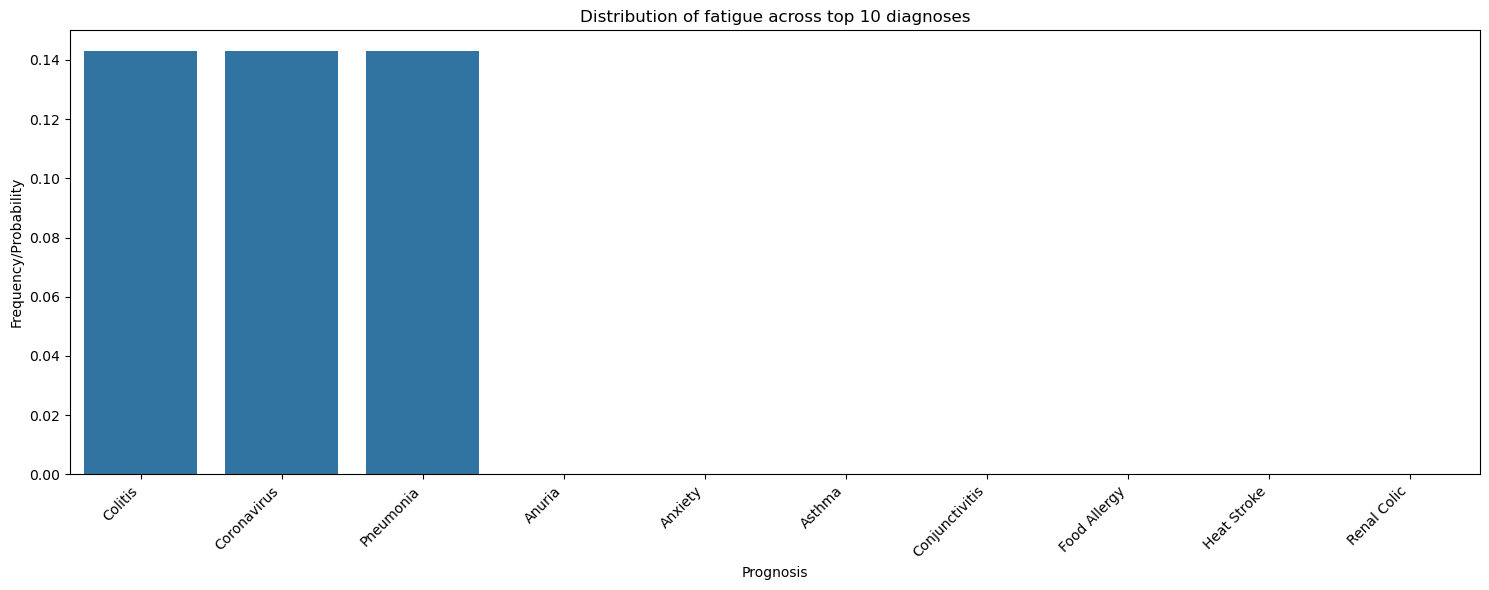


Final_train_df Feature Distributions:


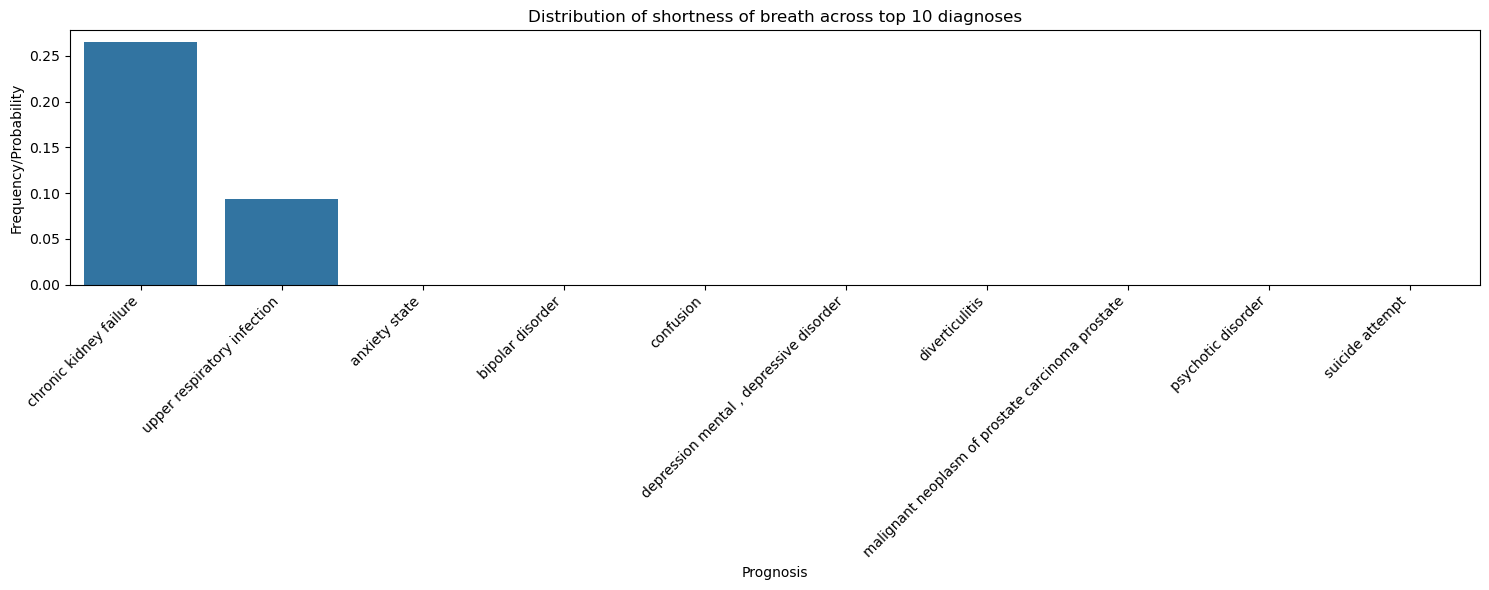

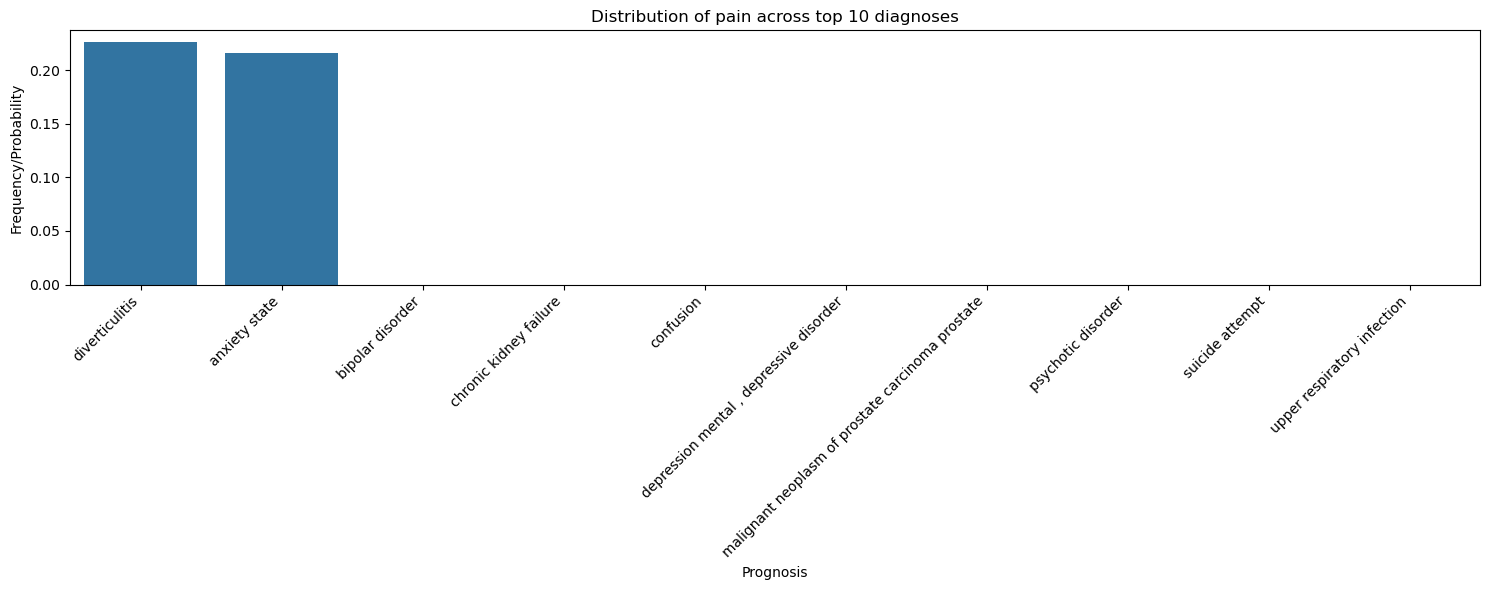

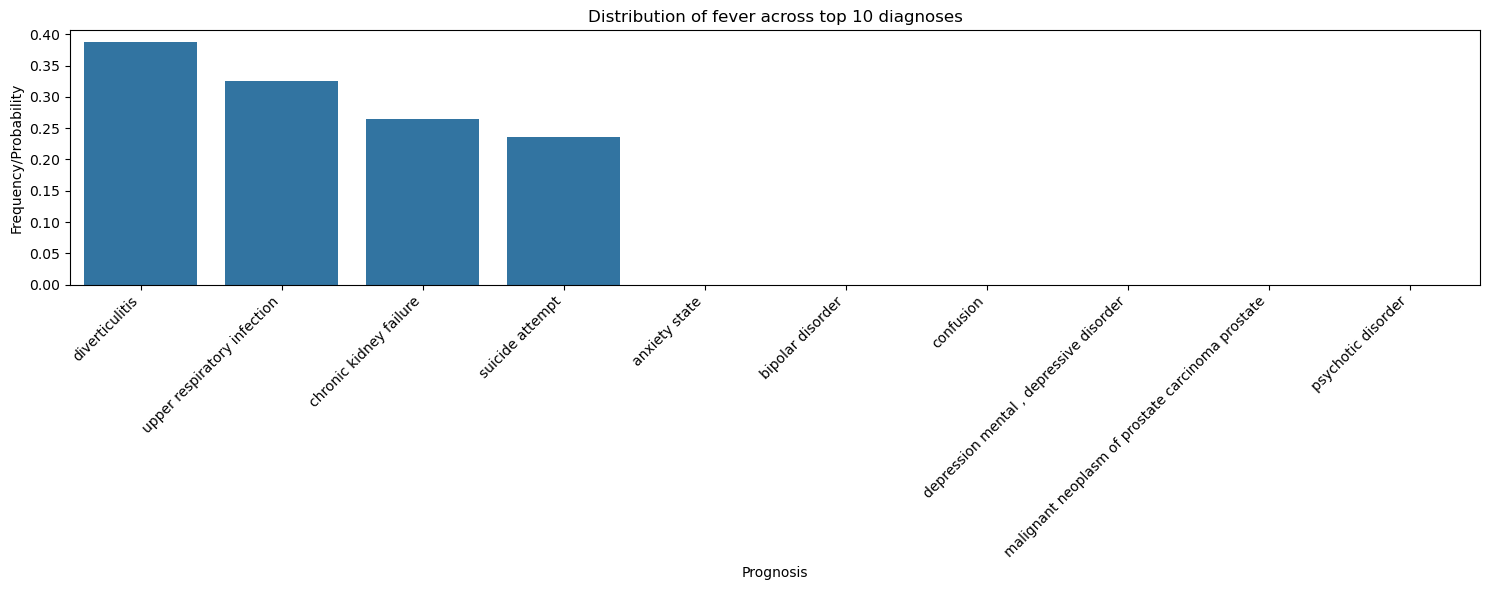

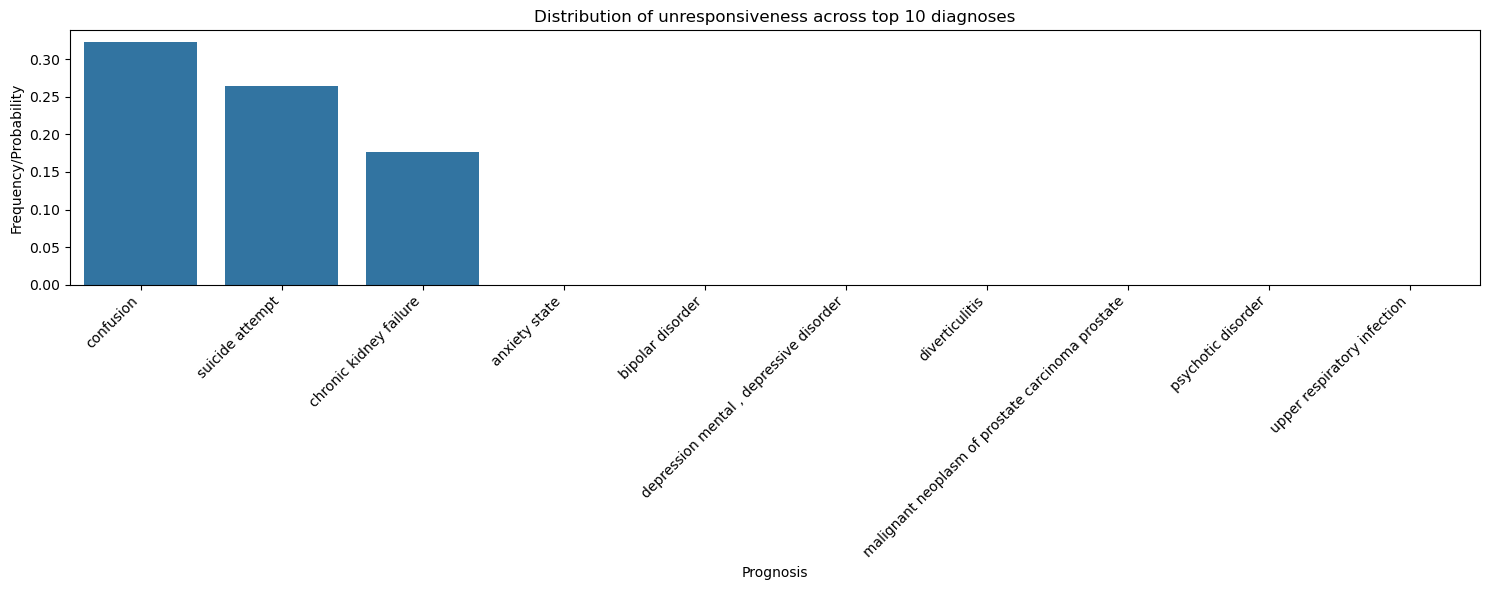

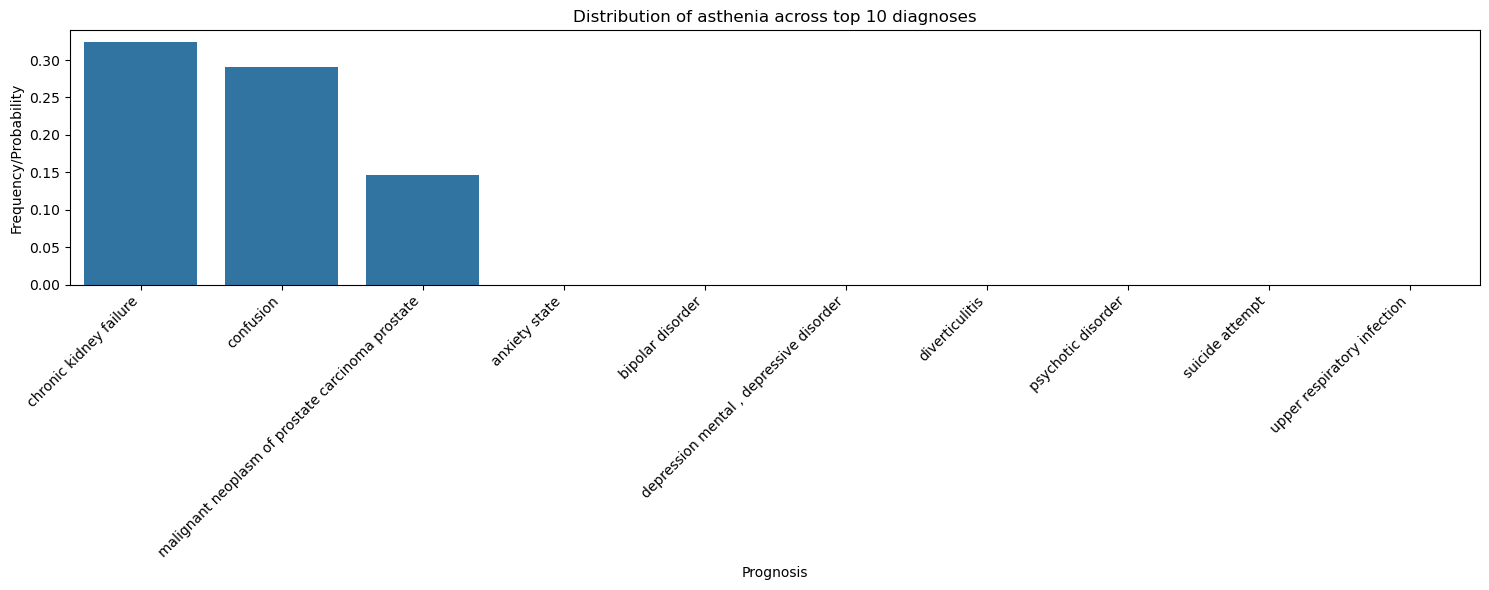


Prognosis_df Feature Distributions:


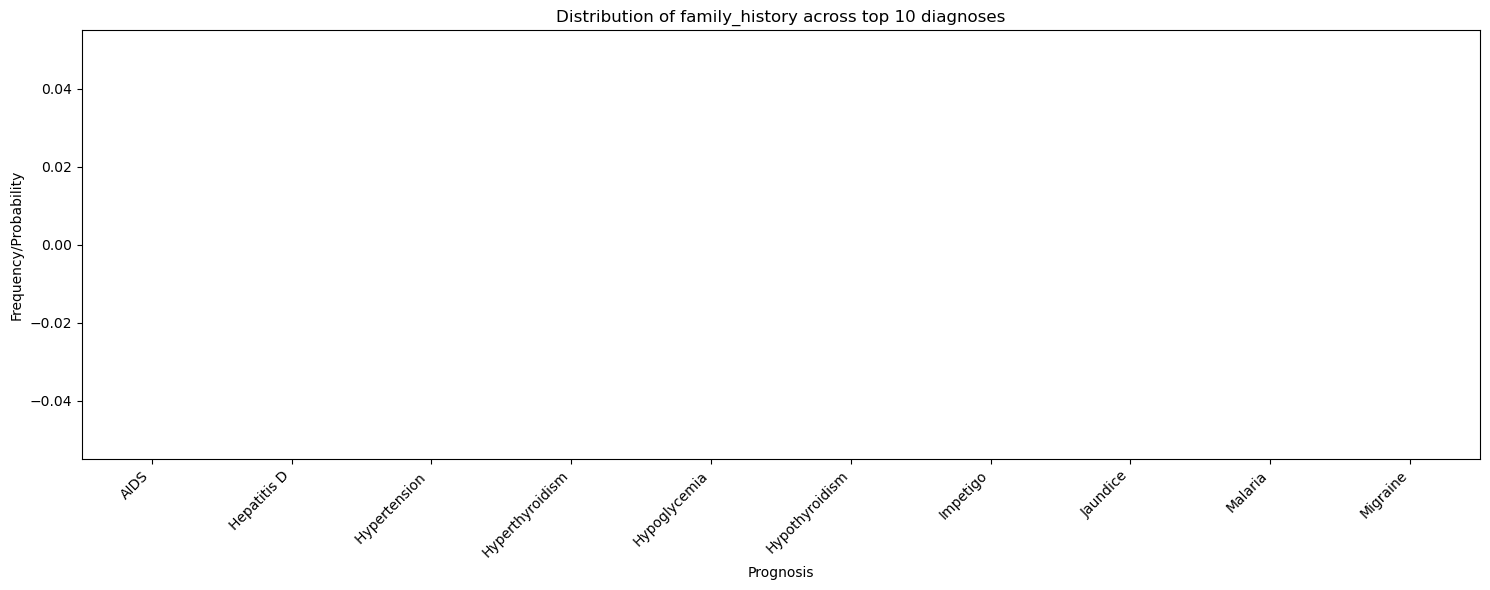

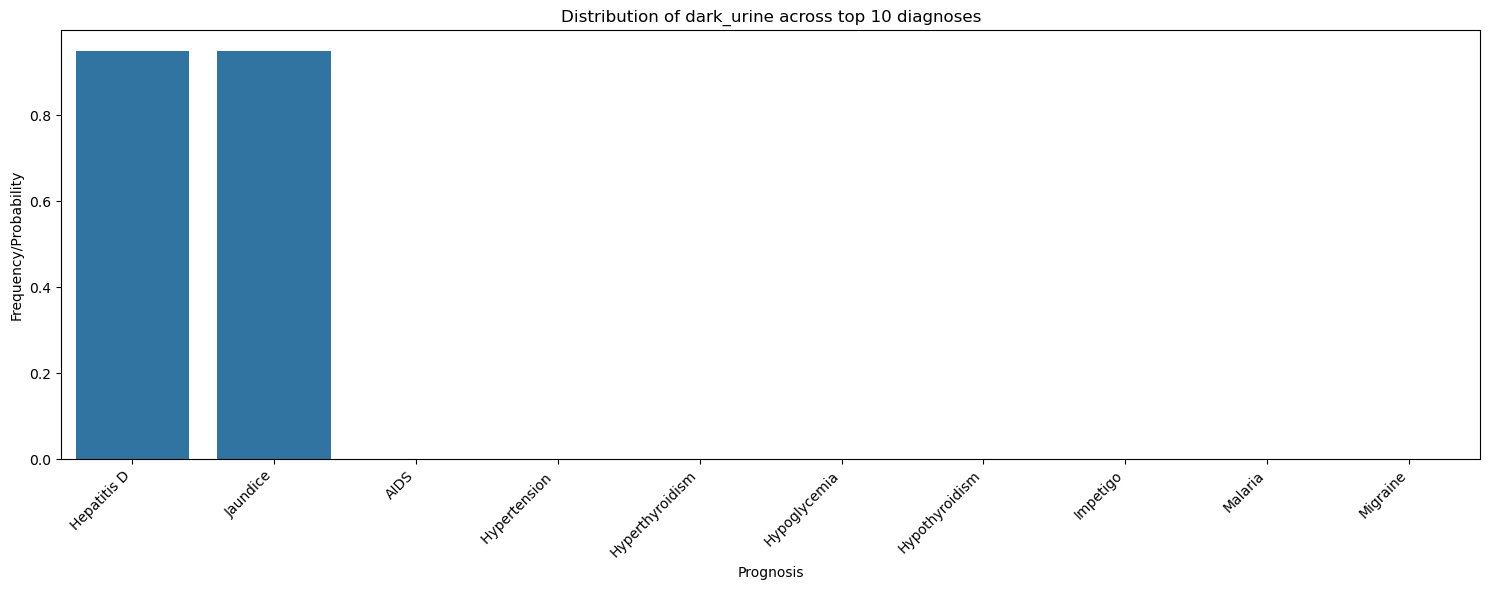

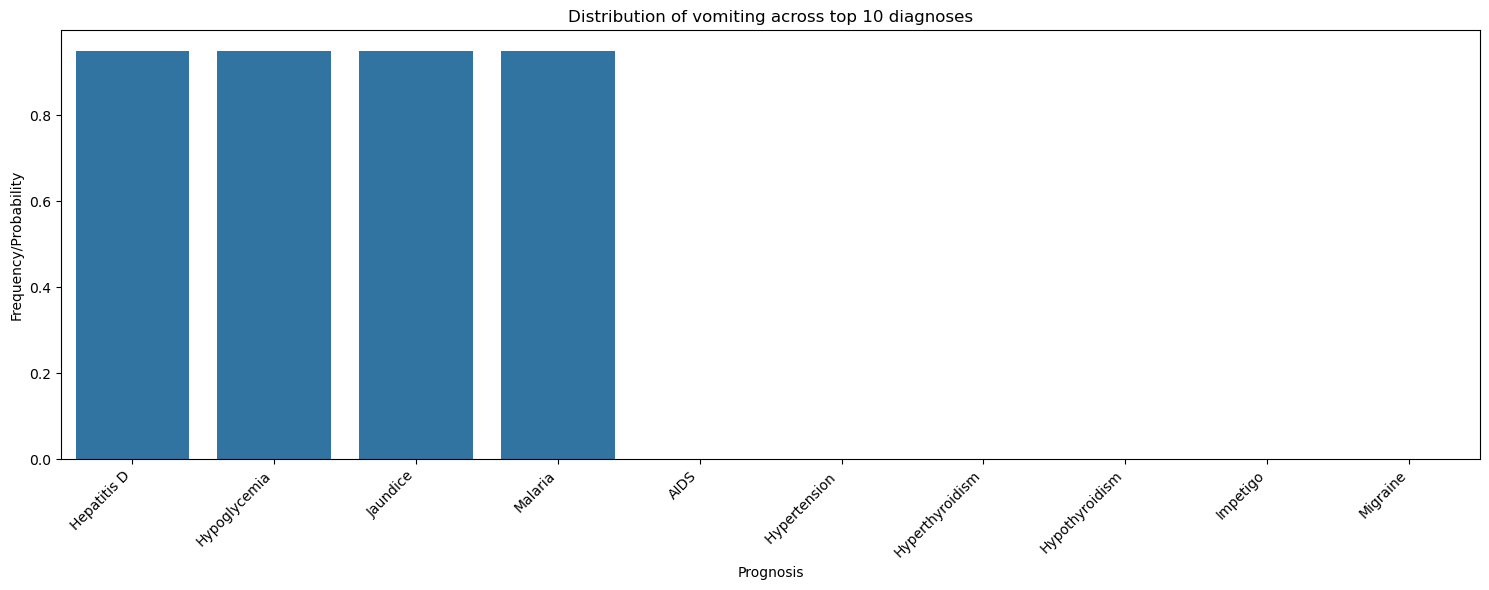

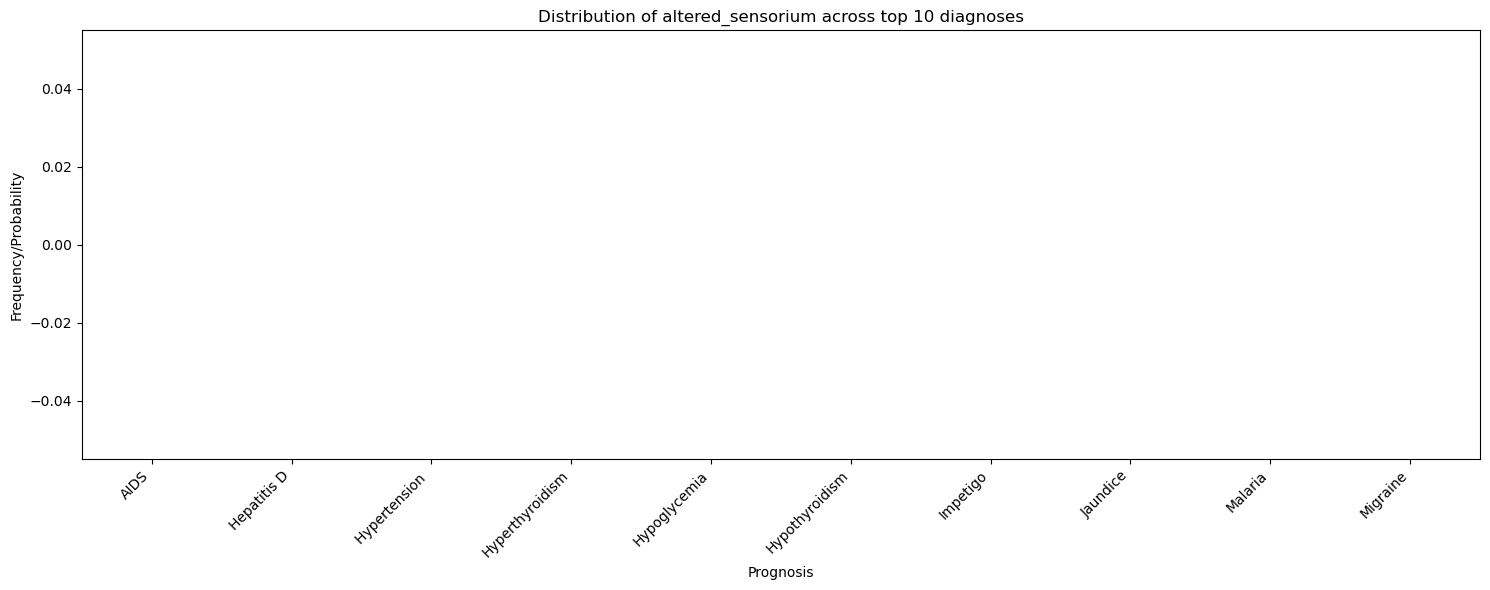


Top 10 Important Features:

disease_df:
                 feature  importance
256          weight loss    0.006213
131           joint pain    0.006173
69             dizziness    0.006169
210  shortness of breath    0.006129
89               fatigue    0.006108
40                chills    0.006086
128              itching    0.006075
169                 pain    0.006022
33     burning sensation    0.006014
159               nausea    0.006005

final_train_df:
                 feature  importance
1    shortness of breath    0.011525
76                  pain    0.011334
45                 fever    0.008967
16      unresponsiveness    0.008591
3               asthenia    0.008555
81              diarrhea    0.008348
44                 cough    0.008177
18              vomiting    0.008014
62               dyspnea    0.007757
156       pain abdominal    0.007726

prognosis_df:


In [343]:
def analyze_feature_distribution(df, top_features, n_diagnoses=10):
    # Create a copy and get the most common diagnoses
    df_copy = df.copy()
    top_diagnoses = df_copy['Prognosis'].value_counts().head(n_diagnoses).index
    
    # Filter for top diagnoses
    df_filtered = df_copy[df_copy['Prognosis'].isin(top_diagnoses)]
    
    # For each top feature, create a plot
    for feature in top_features:
        plt.figure(figsize=(15, 6))
        
        # Convert boolean to int if needed
        if df_filtered[feature].dtype == bool:
            feature_data = df_filtered[feature].astype(int)
        else:
            feature_data = df_filtered[feature]
            
        # Calculate the mean value of the feature for each diagnosis
        feature_by_diagnosis = df_filtered.groupby('Prognosis')[feature].mean().sort_values(ascending=False)
        
        # Create bar plot
        sns.barplot(x=feature_by_diagnosis.index, y=feature_by_diagnosis.values)
        plt.title(f'Distribution of {feature} across top {n_diagnoses} diagnoses')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Frequency/Probability')
        plt.tight_layout()
        plt.show()

# Analyze distributions for each dataset
print("Disease_df Feature Distributions:")
disease_top_features = ['weight loss', 'joint pain', 'dizziness', 'shortness of breath', 'fatigue']
analyze_feature_distribution(disease_df, disease_top_features)

print("\nFinal_train_df Feature Distributions:")
final_train_top_features = ['shortness of breath', 'pain', 'fever', 'unresponsiveness', 'asthenia']
analyze_feature_distribution(final_train_df, final_train_top_features)

print("\nPrognosis_df Feature Distributions:")
prognosis_top_features = ['family_history', 'dark_urine', 'vomiting', 'altered_sensorium']
analyze_feature_distribution(prognosis_df, prognosis_top_features)

# display the top 10 important features for each dataset
print("\nTop 10 Important Features:")
print("\ndisease_df:")
print(disease_importance.head(10))
print("\nfinal_train_df:")
print(final_train_importance.head(10))
print("\nprognosis_df:")

In [344]:
print("Unique diagnoses in each dataset:")
print("\nDisease df diagnoses:", sorted(disease_df['Prognosis'].unique()))
print("\nFinal train df diagnoses:", sorted(final_train_df['Prognosis'].unique()))
print("\nPrognosis df diagnoses:", sorted(prognosis_df['Prognosis'].unique()))

Unique diagnoses in each dataset:

Disease df diagnoses: ['Acetonemia', 'Acute Bronchitis', 'Alopecia', 'Amenorrhea', 'Amnesia', 'Andropause', 'Anemia', 'Angina Pectoris', 'Angioma', 'Anorexia', 'Anthrax', 'Anuria', 'Anxiety', 'Appendicitis', 'Asthma', 'Astigmatism', 'Autism', 'Bloating', 'Burn', 'Candidiasis', 'Cataract', 'Cavity', 'Cellulite', 'Cervical Cancer', 'Chronic Bronchitis', 'Cirrhosis', 'Colitis', 'Conjunctivitis', 'Constipation', 'Coronavirus', 'Dental Abscess', 'Flu', 'Food Allergy', 'Gastroenteritis', 'Gingivitis', 'Glaucoma', 'Gonorrhea', 'Gout', 'Heartburn', 'Heat Stroke', 'Hemorrhoids', 'Hepatic Colic', 'Hepatitis', 'Hernia', 'Herpes', 'Hot Flashes', 'Hypertension', 'Hyperthyroidism', 'Hypotension', 'Hypothyroidism', 'Infant Colic', 'Insomnia', 'Irritable Bowel Syndrome', 'Jaundice', 'Kidney Stones', 'Laryngitis', 'Liver Cancer', 'Lung Cancer', 'Lupus', 'Lyme Disease', 'Malaria', 'Measles', 'Menopause', 'Migraine', 'Multiple Sclerosis', 'Muscle Tear', 'Nightmare', 'Os

In [345]:
from tensorflow.keras.layers import Layer, Input, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class AttentionLayer(Layer):
    def call(self, inputs):
        # inputs[0]: concatenated outputs (batch_size, num_classes * 3)
        # inputs[1]: attention weights (batch_size, 3)
        
        # Reshape concatenated outputs to separate the models
        batch_size = tf.shape(inputs[0])[0]
        num_classes = tf.shape(inputs[0])[1] // 3
        reshaped_inputs = tf.reshape(inputs[0], [batch_size, 3, num_classes])
        
        # Apply attention weights
        attention_weights = tf.expand_dims(inputs[1], -1)  # (batch_size, 3, 1)
        weighted = tf.multiply(reshaped_inputs, attention_weights)
        
        # Sum across the models dimension
        return tf.reduce_sum(weighted, axis=1)  # (batch_size, num_classes)
    

def create_diagnosis_mapping():
    # Create a more flexible mapping dictionary
    diagnosis_mapping = {
        # Respiratory conditions
        'Asthma': 'Respiratory Disease',
        'Bronchial Asthma': 'Respiratory Disease',
        'spasm bronchial': 'Respiratory Disease',
        'Pneumonia': 'Respiratory Disease',
        'pneumonia': 'Respiratory Disease',
        'COPD': 'Respiratory Disease',
        'Bronchitis': 'Respiratory Disease',
        
        # Cardiovascular conditions
        'Hypertension': 'Cardiovascular Disease',
        'hypertensive disease': 'Cardiovascular Disease',
        'heart disease': 'Cardiovascular Disease',
        'Heart Disease': 'Cardiovascular Disease',
        'Varicose Veins': 'Cardiovascular Disease',
        
        # Arthritis and joint conditions
        'Osteoarthritis': 'Joint Disease',
        'arthritis': 'Joint Disease',
        'Rheumatoid Arthritis': 'Joint Disease',
        'degenerative polyarthritis': 'Joint Disease',
        'Joint Pain': 'Joint Disease',
        
        # Gastrointestinal conditions
        'Gastroenteritis': 'Digestive Disease',
        'GERD': 'Digestive Disease',
        'gastroesophageal reflux disease': 'Digestive Disease',
        'Peptic Ulcer': 'Digestive Disease',
        'Gastritis': 'Digestive Disease',
        
        # Liver conditions
        'Hepatitis': 'Liver Disease',
        'Hepatitis A': 'Liver Disease',
        'Hepatitis B': 'Liver Disease',
        'Hepatitis C': 'Liver Disease',
        'Hepatitis D': 'Liver Disease',
        'Hepatitis E': 'Liver Disease',
        'Alcoholic Hepatitis': 'Liver Disease',
        'Cirrhosis': 'Liver Disease',
        
        # Endocrine conditions
        'Diabetes': 'Endocrine Disease',
        'diabetes': 'Endocrine Disease',
        'Hypothyroidism': 'Endocrine Disease',
        'hypothyroidism': 'Endocrine Disease',
        'Hyperthyroidism': 'Endocrine Disease',
        
        # Neurological conditions
        'Migraine': 'Neurological Disease',
        'migraine disorders': 'Neurological Disease',
        'Vertigo': 'Neurological Disease',
        'Epilepsy': 'Neurological Disease',
        
        # Skin conditions
        'Psoriasis': 'Skin Disease',
        'psoriasis': 'Skin Disease',
        'Dermatitis': 'Skin Disease',
        'Eczema': 'Skin Disease',
        
        # Blood conditions
        'Anemia': 'Blood Disease',
        'sickle cell anemia': 'Blood Disease',
        'Iron deficiency': 'Blood Disease',
    }
    return diagnosis_mapping

In [346]:
def analyze_diagnosis_distribution(disease_df, final_train_df, prognosis_df):
    """Helper function to analyze diagnosis distribution across datasets"""
    print("\nAnalyzing diagnosis distribution:")
    
    # Apply mapping first
    diagnosis_mapping = create_diagnosis_mapping()
    
    d1 = disease_df['Prognosis'].map(diagnosis_mapping).fillna(disease_df['Prognosis'])
    d2 = final_train_df['Prognosis'].map(diagnosis_mapping).fillna(final_train_df['Prognosis'])
    d3 = prognosis_df['Prognosis'].map(diagnosis_mapping).fillna(prognosis_df['Prognosis'])
    
    print("\nTop 5 diagnoses in each dataset:")
    print("\nDisease dataset:")
    print(d1.value_counts().head())
    print("\nFinal train dataset:")
    print(d2.value_counts().head())
    print("\nPrognosis dataset:")
    print(d3.value_counts().head())
    
    common_diagnoses = set(d1.unique()) & set(d2.unique()) & set(d3.unique())
    print(f"\nTotal common diagnoses before filtering: {len(common_diagnoses)}")
    print("Common diagnoses:", sorted(list(common_diagnoses)))
    
    return common_diagnoses

In [347]:
def analyze_data_distribution(df, name):
    """Helper function to analyze data distribution"""
    print(f"\n{name} Dataset Analysis:")
    print(f"Total samples: {len(df)}")
    print("\nClass distribution:")
    print(df['Prognosis'].value_counts())
    print("\nSample features:", list(df.columns)[:5])



In [348]:
def preprocess_features(disease_df, final_train_df, prognosis_df, min_samples_per_class=6):
    """
    Preprocess features with comprehensive diagnosis mapping and balancing.
    """
    # Create copies of dataframes
    disease_df = disease_df.copy()
    final_train_df = final_train_df.copy()
    prognosis_df = prognosis_df.copy()
    
    print("Initial shapes:")
    print(f"Disease dataset: {disease_df.shape}")
    print(f"Final train dataset: {final_train_df.shape}")
    print(f"Prognosis dataset: {prognosis_df.shape}")
    
    # Print initial unique classes
    print("\nInitial unique classes in each dataset:")
    print("Disease dataset:", disease_df['Prognosis'].nunique())
    print("Final train dataset:", final_train_df['Prognosis'].nunique())
    print("Prognosis dataset:", prognosis_df['Prognosis'].nunique())
    
    # Define comprehensive diagnosis mapping
    diagnosis_mapping = {
        # Respiratory conditions
        'Asthma': 'Respiratory Disease',
        'Bronchial Asthma': 'Respiratory Disease',
        'pneumonia': 'Respiratory Disease',
        'Pneumonia': 'Respiratory Disease',
        'COPD': 'Respiratory Disease',
        'Bronchitis': 'Respiratory Disease',
        'upper respiratory infection': 'Respiratory Disease',
        'respiratory infection': 'Respiratory Disease',
        'Common Cold': 'Respiratory Disease',
        'Tuberculosis': 'Respiratory Disease',
        'bronchitis': 'Respiratory Disease',
        
        # Digestive conditions
        'Gastroenteritis': 'Digestive Disease',
        'GERD': 'Digestive Disease',
        'Colitis': 'Digestive Disease',
        'Gastritis': 'Digestive Disease',
        'Food Allergy': 'Digestive Disease',
        'Peptic ulcer': 'Digestive Disease',
        'gastritis': 'Digestive Disease',
        'peptic ulcer disease': 'Digestive Disease',
        'inflammatory bowel disease': 'Digestive Disease',
        
        # Cardiovascular conditions
        'Hypertension': 'Cardiovascular Disease',
        'hypertension': 'Cardiovascular Disease',
        'Heart Disease': 'Cardiovascular Disease',
        'heart disease': 'Cardiovascular Disease',
        'heart failure': 'Cardiovascular Disease',
        'coronary artery disease': 'Cardiovascular Disease',
        'Angina': 'Cardiovascular Disease',
        
        # Metabolic conditions
        'Diabetes': 'Metabolic Disease',
        'diabetes': 'Metabolic Disease',
        'Hypothyroidism': 'Metabolic Disease',
        'hypothyroidism': 'Metabolic Disease',
        'Hyperthyroidism': 'Metabolic Disease',
        'diabetes mellitus': 'Metabolic Disease',
        'thyroid disease': 'Metabolic Disease'
    }
    
    print("\nApplying diagnosis mapping...")
    # Apply mapping but keep original if not in mapping
    disease_df['Prognosis'] = disease_df['Prognosis'].map(lambda x: diagnosis_mapping.get(x, x))
    final_train_df['Prognosis'] = final_train_df['Prognosis'].map(lambda x: diagnosis_mapping.get(x, x))
    prognosis_df['Prognosis'] = prognosis_df['Prognosis'].map(lambda x: diagnosis_mapping.get(x, x))
    
    print("\nClass distribution after mapping:")
    print("\nDisease dataset:")
    print(disease_df['Prognosis'].value_counts())
    print("\nFinal train dataset:")
    print(final_train_df['Prognosis'].value_counts())
    print("\nPrognosis dataset:")
    print(prognosis_df['Prognosis'].value_counts())
    
    # Find common diagnoses with sufficient samples
    common_diagnoses = set()
    all_diagnoses = set(disease_df['Prognosis'].unique()) & \
                    set(final_train_df['Prognosis'].unique()) & \
                    set(prognosis_df['Prognosis'].unique())
    
    for diagnosis in all_diagnoses:
        counts = [
            (disease_df['Prognosis'] == diagnosis).sum(),
            (final_train_df['Prognosis'] == diagnosis).sum(),
            (prognosis_df['Prognosis'] == diagnosis).sum()
        ]
        if min(counts) >= min_samples_per_class:
            common_diagnoses.add(diagnosis)
    
    print(f"\nFound {len(common_diagnoses)} common diagnoses with at least {min_samples_per_class} samples:")
    print(sorted(list(common_diagnoses)))
    
    if len(common_diagnoses) < 2:
        print("\nWarning: Not enough common diagnoses found. Reducing minimum samples requirement...")
        # Try with reduced minimum samples
        min_samples_per_class = max(2, min_samples_per_class // 2)
        common_diagnoses = set()
        for diagnosis in all_diagnoses:
            counts = [
                (disease_df['Prognosis'] == diagnosis).sum(),
                (final_train_df['Prognosis'] == diagnosis).sum(),
                (prognosis_df['Prognosis'] == diagnosis).sum()
            ]
            if min(counts) >= min_samples_per_class:
                common_diagnoses.add(diagnosis)
        
        print(f"After reducing minimum samples to {min_samples_per_class}:")
        print(f"Found {len(common_diagnoses)} common diagnoses")
        print(sorted(list(common_diagnoses)))
        
        if len(common_diagnoses) < 2:
            raise ValueError("Still not enough common diagnoses found even after reducing minimum samples requirement")
    
    # Filter to keep only common diagnoses
    disease_df = disease_df[disease_df['Prognosis'].isin(common_diagnoses)]
    final_train_df = final_train_df[final_train_df['Prognosis'].isin(common_diagnoses)]
    prognosis_df = prognosis_df[prognosis_df['Prognosis'].isin(common_diagnoses)]
    
    # Get common features
    common_features = set(disease_df.columns) & set(final_train_df.columns) & set(prognosis_df.columns)
    common_features = common_features - {'Prognosis'}
    features_to_keep = list(common_features) + ['Prognosis']
    
    # Keep only common features
    disease_df = disease_df[features_to_keep]
    final_train_df = final_train_df[features_to_keep]
    prognosis_df = prognosis_df[features_to_keep]
    
    # Prepare features and labels
    X_disease = disease_df.drop('Prognosis', axis=1)
    X_final_train = final_train_df.drop('Prognosis', axis=1)
    X_prognosis = prognosis_df.drop('Prognosis', axis=1)
    
    # Ensure all datasets have the same number of samples per class
    min_samples_per_class_per_dataset = {}
    for diagnosis in common_diagnoses:
        counts = [
            len(X_disease[disease_df['Prognosis'] == diagnosis]),
            len(X_final_train[final_train_df['Prognosis'] == diagnosis]),
            len(X_prognosis[prognosis_df['Prognosis'] == diagnosis])
        ]
        min_samples_per_class_per_dataset[diagnosis] = min(counts)
    
    # Sample each class separately
    sampled_dfs = []
    for df, X, name in [(disease_df, X_disease, 'disease'),
                        (final_train_df, X_final_train, 'final_train'),
                        (prognosis_df, X_prognosis, 'prognosis')]:
        sampled_data = []
        for diagnosis in common_diagnoses:
            diagnosis_data = df[df['Prognosis'] == diagnosis].sample(
                n=min_samples_per_class_per_dataset[diagnosis],
                random_state=42
            )
            sampled_data.append(diagnosis_data)
        sampled_dfs.append(pd.concat(sampled_data).reset_index(drop=True))
    
    disease_df, final_train_df, prognosis_df = sampled_dfs
    
    # Update features and labels after sampling
    X_disease = disease_df.drop('Prognosis', axis=1)
    X_final_train = final_train_df.drop('Prognosis', axis=1)
    X_prognosis = prognosis_df.drop('Prognosis', axis=1)
    
    y_disease = disease_df['Prognosis']
    y_final_train = final_train_df['Prognosis']
    y_prognosis = prognosis_df['Prognosis']
    
    # One-hot encode features
    onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_disease_encoded = onehot.fit_transform(X_disease)
    X_final_train_encoded = onehot.transform(X_final_train)
    X_prognosis_encoded = onehot.transform(X_prognosis)
    
    print("\nApplying balancing...")
    from imblearn.over_sampling import RandomOverSampler
    from collections import Counter
    
    # Use random oversampling
    ros = RandomOverSampler(random_state=42)
    
    X_disease_balanced, y_disease_balanced = ros.fit_resample(X_disease_encoded, y_disease)
    X_final_train_balanced, y_final_train_balanced = ros.fit_resample(X_final_train_encoded, y_final_train)
    X_prognosis_balanced, y_prognosis_balanced = ros.fit_resample(X_prognosis_encoded, y_prognosis)
    
    print("\nAfter balancing:")
    print("Disease dataset:", Counter(y_disease_balanced))
    print("Final train dataset:", Counter(y_final_train_balanced))
    print("Prognosis dataset:", Counter(y_prognosis_balanced))
    
    # Create balanced standardized dataframes
    feature_names = onehot.get_feature_names_out(X_disease.columns)
    
    disease_standardized = pd.DataFrame(X_disease_balanced, columns=feature_names)
    final_train_standardized = pd.DataFrame(X_final_train_balanced, columns=feature_names)
    prognosis_standardized = pd.DataFrame(X_prognosis_balanced, columns=feature_names)
    
    disease_standardized['Prognosis'] = y_disease_balanced
    final_train_standardized['Prognosis'] = y_final_train_balanced
    prognosis_standardized['Prognosis'] = y_prognosis_balanced
    
    print("\nFinal shapes after balancing:")
    print(f"Disease standardized: {disease_standardized.shape}")
    print(f"Final train standardized: {final_train_standardized.shape}")
    print(f"Prognosis standardized: {prognosis_standardized.shape}")
    
    return disease_standardized, final_train_standardized, prognosis_standardized

In [349]:
def create_base_model(input_dim, num_classes, model_name):
    """Create a base XGBoost model"""
    import xgboost as xgb
    
    # Create XGBoost classifier
    model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softprob',  # for multi-class classification
        num_class=num_classes,
        random_state=42,
        use_label_encoder=False,  # avoid warning
        eval_metric='mlogloss'  # for multi-class classification
    )
    
    return model

In [350]:
def create_ensemble_model(input_dims, num_classes):
    """Create ensemble of XGBoost models with voting"""
    from sklearn.ensemble import VotingClassifier
    
    # Create individual models
    models = []
    for name, dim in input_dims.items():
        model = create_base_model(dim, num_classes, name)
        models.append((name, model))
    
    # Create voting ensemble
    ensemble = VotingClassifier(
        estimators=models,
        voting='soft',  # use probability predictions
        n_jobs=-1  # use all available cores
    )
    
    return ensemble

Starting training process...
Starting ensemble training process...
Initial shapes:
Disease dataset: (511, 264)
Final train dataset: (2564, 402)
Prognosis dataset: (4961, 134)

Initial unique classes in each dataset:
Disease dataset: 108
Final train dataset: 133
Prognosis dataset: 41

Applying diagnosis mapping...

Class distribution after mapping:

Disease dataset:
Prognosis
Digestive Disease      22
Respiratory Disease    14
Metabolic Disease      12
Anuria                  7
Coronavirus             7
                       ..
Cervical Cancer         3
Chronic Bronchitis      3
Skin Abscess            3
Amnesia                 2
Alopecia                2
Name: count, Length: 104, dtype: int64

Final train dataset:
Prognosis
Respiratory Disease    96
Metabolic Disease      53
bipolar disorder       43
anxiety state          37
psychotic disorder     37
                       ..
pneumothorax            9
kidney disease          7
migraine disorders      7
pancytopenia            7
decub

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:53:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluating model...

Test Accuracy: 0.9167

Classification Report:
                     precision    recall  f1-score   support

  Digestive Disease       0.80      1.00      0.89         4
  Metabolic Disease       1.00      1.00      1.00         4
Respiratory Disease       1.00      0.75      0.86         4

           accuracy                           0.92        12
          macro avg       0.93      0.92      0.92        12
       weighted avg       0.93      0.92      0.92        12



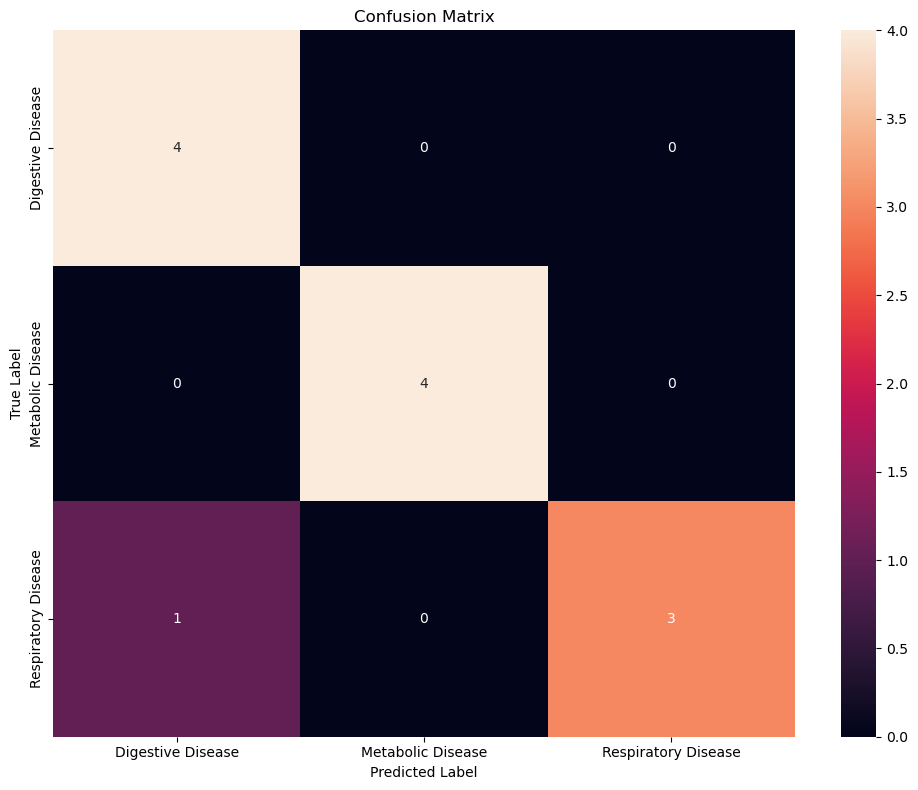

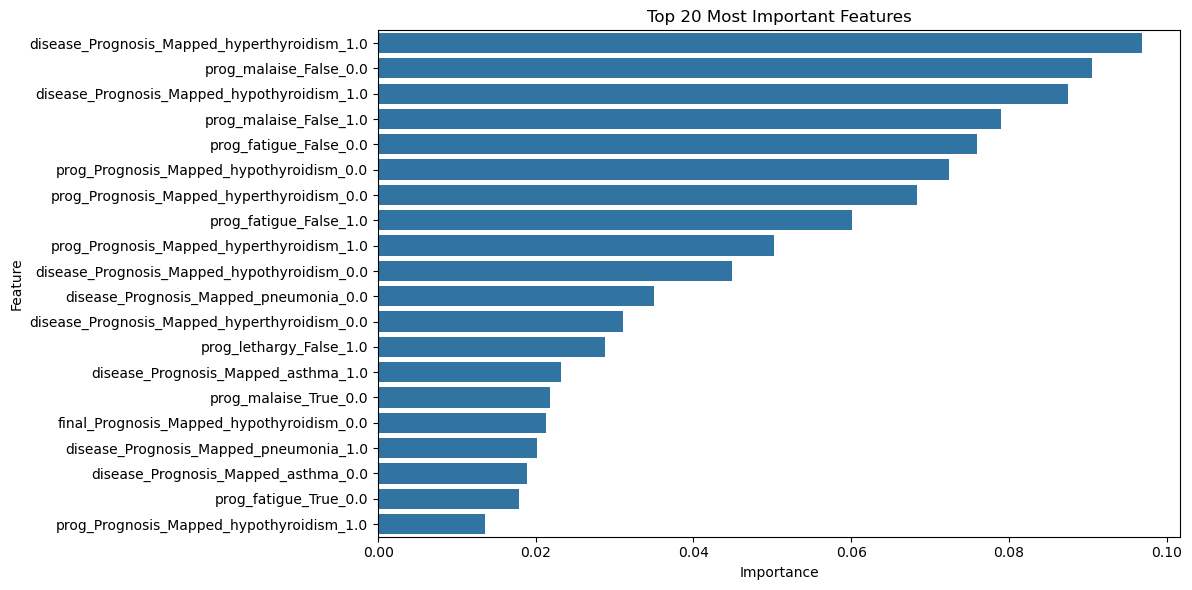


Saving model and related data...
Model and data saved successfully!

Training completed successfully!


In [351]:
def train_ensemble():
    """Train the XGBoost ensemble model"""
    print("Starting ensemble training process...")
    
    try:
        # Preprocess data
        disease_standardized, final_train_standardized, prognosis_standardized = preprocess_features(
            disease_df, final_train_df, prognosis_df, min_samples_per_class=2
        )
        
        if len(disease_standardized) == 0:
            raise ValueError("No samples available for training!")
        
        # Prepare features and labels
        X_disease = disease_standardized.drop('Prognosis', axis=1)
        X_final_train = final_train_standardized.drop('Prognosis', axis=1)
        X_prognosis = prognosis_standardized.drop('Prognosis', axis=1)
        
        # One-hot encode features
        onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        X_disease_encoded = onehot.fit_transform(X_disease)
        X_final_train_encoded = onehot.transform(X_final_train)
        X_prognosis_encoded = onehot.transform(X_prognosis)
        
        # Concatenate all encoded features horizontally
        X_combined = np.hstack([X_disease_encoded, X_final_train_encoded, X_prognosis_encoded])
        
        # Ensure labels are strings before encoding
        y_raw = disease_standardized['Prognosis'].astype(str)
        
        # Create label encoder for target
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(y_raw)
        
        # Print dataset information
        print("\nDataset information:")
        print(f"Number of samples: {len(y)}")
        print(f"Number of classes: {len(label_encoder.classes_)}")
        print("Classes:", label_encoder.classes_)
        print(f"Feature matrix shape: {X_combined.shape}")
        
        # Create XGBoost model
        import xgboost as xgb
        model = xgb.XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=6,
            min_child_weight=1,
            gamma=0,
            subsample=0.8,
            colsample_bytree=0.8,
            objective='multi:softprob',
            num_class=len(label_encoder.classes_),
            random_state=42,
            use_label_encoder=False
        )
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_combined, 
            y,
            test_size=0.2,
            random_state=42,
            stratify=y
        )
        
        print("\nStarting model training...")
        # Train the model
        model.fit(X_train, y_train)
        
        # Evaluate model
        print("\nEvaluating model...")
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(
            y_test,
            y_pred,
            target_names=label_encoder.classes_
        )
        
        print(f"\nTest Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(report)
        
        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_
        )
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()
        
        # Get feature names from one-hot encoder
        feature_names = []
        for prefix, df in [('disease_', X_disease), ('final_', X_final_train), ('prog_', X_prognosis)]:
            encoded_features = onehot.get_feature_names_out(df.columns)
            feature_names.extend([prefix + str(f) for f in encoded_features])
        
        # Plot feature importance
        plt.figure(figsize=(12, 6))
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': model.feature_importances_
        })
        importance_df = importance_df.sort_values('Importance', ascending=False).head(20)
        
        sns.barplot(data=importance_df, x='Importance', y='Feature')
        plt.title('Top 20 Most Important Features')
        plt.tight_layout()
        plt.show()
        
        # Save model and related data
        print("\nSaving model and related data...")
        import joblib
        joblib.dump(model, 'medical_diagnosis_model.joblib')
        joblib.dump(label_encoder, 'label_encoder.joblib')
        joblib.dump(feature_names, 'feature_names.joblib')
        joblib.dump(onehot, 'onehot_encoder.joblib')
        print("Model and data saved successfully!")
        
        return model, label_encoder
        
    except Exception as e:
        print(f"Error during training: {str(e)}")
        raise

# Main execution
if __name__ == "__main__":
    print("Starting training process...")
    model, label_encoder = train_ensemble()
    print("\nTraining completed successfully!")

Starting training process...
Starting ensemble training process...
Initial shapes:
Disease dataset: (511, 264)
Final train dataset: (2564, 402)
Prognosis dataset: (4961, 134)

Initial unique classes in each dataset:
Disease dataset: 108
Final train dataset: 133
Prognosis dataset: 41

Applying diagnosis mapping...

Class distribution after mapping:

Disease dataset:
Prognosis
Digestive Disease      22
Respiratory Disease    14
Metabolic Disease      12
Anuria                  7
Coronavirus             7
                       ..
Cervical Cancer         3
Chronic Bronchitis      3
Skin Abscess            3
Amnesia                 2
Alopecia                2
Name: count, Length: 104, dtype: int64

Final train dataset:
Prognosis
Respiratory Disease    96
Metabolic Disease      53
bipolar disorder       43
anxiety state          37
psychotic disorder     37
                       ..
pneumothorax            9
kidney disease          7
migraine disorders      7
pancytopenia            7
decub

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:53:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluating model...

Test Accuracy: 0.9167

Classification Report:
                     precision    recall  f1-score   support

  Digestive Disease       0.80      1.00      0.89         4
  Metabolic Disease       1.00      1.00      1.00         4
Respiratory Disease       1.00      0.75      0.86         4

           accuracy                           0.92        12
          macro avg       0.93      0.92      0.92        12
       weighted avg       0.93      0.92      0.92        12



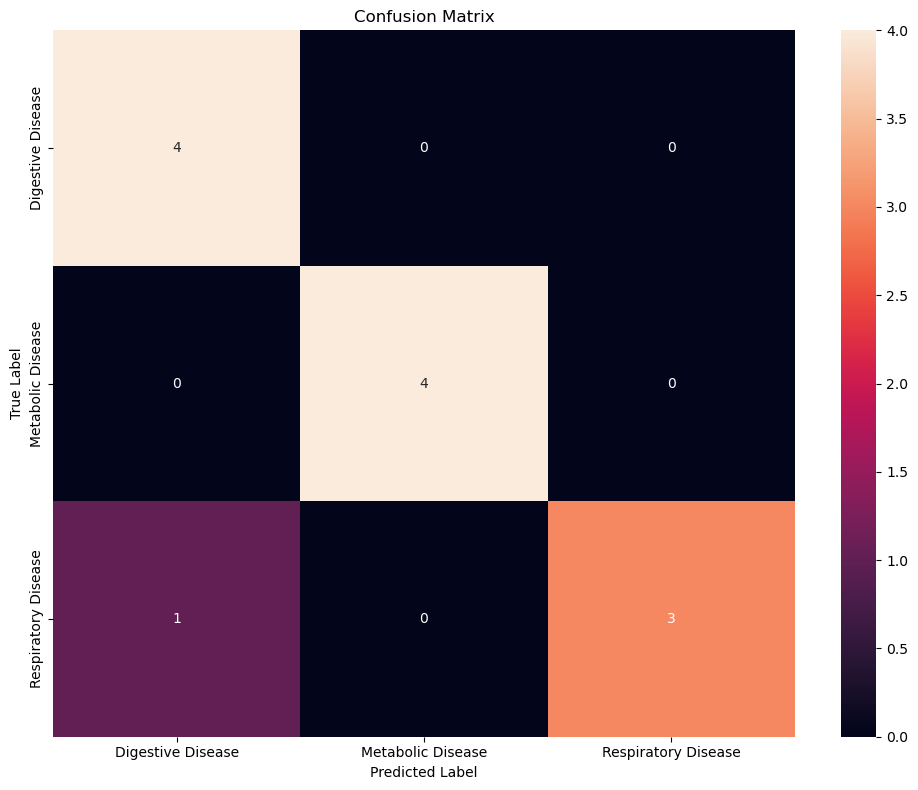

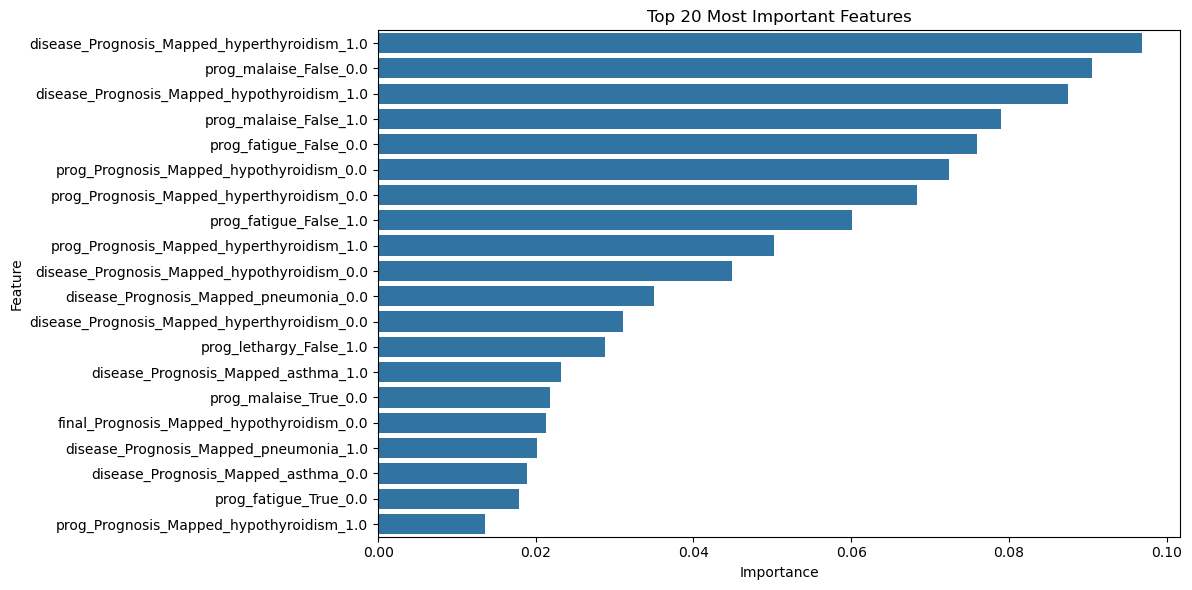


Saving model and related data...
Model and data saved successfully!

Training completed successfully!


In [352]:
# Main execution cell
if __name__ == "__main__":
    print("Starting training process...")
    
    # Train the model
    model, label_encoder = train_ensemble()  # This will handle all plotting internally
    
    print("\nTraining completed successfully!")
    
   

In [353]:
# def evaluate_ensemble(model, X_disease, X_final_train, X_prognosis, y_true, label_encoder):
#     print("\nEvaluating model performance...")
    
#     # Make predictions
#     y_pred = model.predict([X_disease, X_final_train, X_prognosis])
#     y_pred_classes = np.argmax(y_pred, axis=1)
    
#     # Print classification report
#     print("\nClassification Report:")
#     print(classification_report(
#         y_true,
#         y_pred_classes,
#         target_names=label_encoder.classes_
#     ))
    
#     # Plot confusion matrix
#     plt.figure(figsize=(12, 8))
#     cm = confusion_matrix(y_true, y_pred_classes)
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=label_encoder.classes_,
#                 yticklabels=label_encoder.classes_)
#     plt.title('Confusion Matrix')
#     plt.ylabel('True Label')
#     plt.xlabel('Predicted Label')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Main execution cell
# if __name__ == "__main__":
#     print("Starting training process...")
    
#     # Train the model
#     model, history, label_encoder = train_ensemble()
    
#     # Plot training history
#     plt.figure(figsize=(12, 4))
    
#     # Loss plot
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['loss'], label='Training Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Model Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()

#     # Accuracy plot
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['accuracy'], label='Training Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.title('Model Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     # Prepare final evaluation data
#     print("\nPreparing final evaluation data...")
#     disease_standardized, final_train_standardized, prognosis_standardized = preprocess_features(
#         disease_df, final_train_df, prognosis_df
#     )
    
#     disease_filtered, final_train_filtered, prognosis_filtered, _ = harmonize_labels(
#         disease_standardized, final_train_standardized, prognosis_standardized
#     )
    
#     X_disease = disease_filtered.drop('Prognosis', axis=1)
#     X_final_train = final_train_filtered.drop('Prognosis', axis=1)
#     X_prognosis = prognosis_filtered.drop('Prognosis', axis=1)
#     y_true = label_encoder.transform(disease_filtered['Prognosis'])
    
#     # Evaluate the model
#     evaluate_ensemble(model, X_disease, X_final_train, X_prognosis, y_true, label_encoder)